In [590]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import os
import datetime
import math

In [591]:
#from google.colab import drive
#drive.mount('/content/drive')

In [592]:
#!ls "/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/data"

In [593]:
def show_dataframe_info(df):
    print(df.shape)
    print(list(df.columns.values))
    print('\n dataframe info: \n', df.info())
    print('\n dataframe column datatypes:\n', df.dtypes)

In [594]:
#airquality_data = pd.read_csv('/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/experiments/data/AirQuality/AirQo/Bugolobi(ambrosoli)/bugolobi.csv')

root_data_dir = 'data'
base_dir ='data\AirQuality\AirQo'


#airquality_data = pd.read_csv(os.path.join(base_dir,'Makerere','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Makerere')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Bugolobi(ambrosoli)','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Bugolobi(ambrosoli)')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Mulago','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath= os.path.join(base_dir,'Mulago')

airquality_data = pd.read_csv(os.path.join(base_dir,'Makindye','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
filepath = os.path.join(base_dir, 'Makindye')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Bukoto(kisu)','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath= os.path.join(base_dir,'Bukoto(kisu)')


#airquality_data = pd.read_csv(os.path.join(base_dir,'Lubowa','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Lubowa')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Jinja_Road(NEMAHOUSE)',' merged_hourly_airquality_greenness_meteorological_dataset.csv '))
#filepath = os.path.join(base_dir,'Jinja_Road(NEMAHOUSE)')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Rubaga_Kabusu','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Rubaga_Kabusu')

#airquality_data = pd.read_csv(os.path.join(base_dir,'Kireka','merged_hourly_airquality_greenness_meteorological_dataset.csv'))
#filepath = os.path.join(base_dir,'Kireka')

#airquality_data = pd.read_csv(os.path.join(base_dir, 'Nsambya(American_Embassy)',' merged_hourly_airquality_greenness_meteorological_dataset.csv '))
#filepath = os.path.join(base_dir, 'Nsambya(American_Embassy)')
airquality_data.head(10)

,TimeStamp,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),...,temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
0,2017-09-09 18:00,6.36,8.31,18.36,18,0.2002,0.366,73,0.0,87.50,...,23.27,0.44,0,0,0,0,0,1,0,0
1,2017-09-09 19:00,9.98,12.27,18.93,19,0.2002,0.366,77,0.0,87.58,...,22.72,0.38,0,0,1,0,0,0,0,0
2,2017-09-09 20:00,12.33,15.04,21.93,20,0.2002,0.366,80,0.0,87.67,...,22.29,0.37,0,0,0,0,0,1,0,0
3,2017-09-09 21:00,16.61,22.81,45.38,21,0.2002,0.366,82,0.0,87.66,...,21.71,0.34,0,1,0,0,0,0,0,0
4,2017-09-09 22:00,17.01,23.40,46.11,22,0.2002,0.366,87,0.0,87.68,...,20.86,0.29,0,0,1,0,0,0,0,0
5,2017-09-09 23:00,17.29,23.77,44.29,23,0.2002,0.366,90,0.0,87.77,...,20.30,0.46,0,0,0,0,0,1,0,0
6,2017-09-10 0:00,16.59,22.76,39.24,0,0.2002,0.366,91,0.0,87.74,...,20.30,0.59,0,0,0,0,0,1,0,0
7,2017-09-10 1:00,16.15,22.14,35.52,1,0.2002,0.366,91,0.0,87.67,...,20.14,0.99,0,0,0,0,0,1,0,0
8,2017-09-10 2:00,15.33,21.00,31.42,2,0.2002,0.366,89,0.0,87.63,...,20.15,1.19,0,0,0,0,0,1,0,0
9,2017-09-10 3:00,13.99,19.19,27.34,3,0.2002,0.366,89,0.0,87.59,...,19.78,0.69,1,0,0,0,0,0,0,0


In [595]:
airquality_data["TimeStamp"] = pd.to_datetime(airquality_data["TimeStamp"])
airquality_data = airquality_data.set_index('TimeStamp')

In [597]:
airquality_data.head()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
TimeStamp,,,,,,,,,,,,,,,,,,,,
2017-09-09 18:00:00,6.36,8.31,18.36,18,0.2002,0.366,73,0.0,87.50,0.9,23.27,0.44,0,0,0,0,0,1,0,0
2017-09-09 19:00:00,9.98,12.27,18.93,19,0.2002,0.366,77,0.0,87.58,0.0,22.72,0.38,0,0,1,0,0,0,0,0
2017-09-09 20:00:00,12.33,15.04,21.93,20,0.2002,0.366,80,0.0,87.67,0.0,22.29,0.37,0,0,0,0,0,1,0,0
2017-09-09 21:00:00,16.61,22.81,45.38,21,0.2002,0.366,82,0.0,87.66,0.0,21.71,0.34,0,1,0,0,0,0,0,0
2017-09-09 22:00:00,17.01,23.40,46.11,22,0.2002,0.366,87,0.0,87.68,0.0,20.86,0.29,0,0,1,0,0,0,0,0


In [598]:
airquality_data.tail()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
TimeStamp,,,,,,,,,,,,,,,,,,,,
2019-04-05 10:00:00,1.92,2.81,6.04,10,0.2186,0.3674,69,0.0,87.84,467.87,27.14,1.10,0,0,0,0,1,0,0,0
2019-04-05 11:00:00,1.68,2.58,5.58,11,0.2186,0.3674,64,0.0,87.80,557.57,27.65,1.14,0,0,0,0,1,0,0,0
2019-04-05 12:00:00,1.69,2.69,6.13,12,0.2186,0.3674,61,0.0,87.73,878.48,28.34,1.37,0,0,0,0,1,0,0,0
2019-04-05 13:00:00,1.51,2.29,4.90,13,0.2186,0.3674,62,0.0,87.65,809.73,28.47,1.23,0,0,0,0,1,0,0,0
2019-04-05 14:00:00,1.78,2.60,5.21,14,0.2186,0.3674,62,0.0,87.56,832.38,28.80,1.34,0,0,0,0,1,0,0,0


In [599]:
show_dataframe_info(airquality_data)

(12596, 20)
['PM1(Ug/m3)', 'PM2.5(Ug/m3)', 'PM10(Ug/m3)', 'hour', 'EVI', 'NDVI', 'humidity (%)', 'precipitation (mm)', 'pressure (kPa)', 'radiation (W/m2)', 'temperature (oC)', 'windspeed (m/s)', 'winddirection_E', 'winddirection_N', 'winddirection_NE', 'winddirection_NW', 'winddirection_S', 'winddirection_SE', 'winddirection_SW', 'winddirection_W']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12596 entries, 2017-09-09 18:00:00 to 2019-04-05 14:00:00
Data columns (total 20 columns):
PM1(Ug/m3)            12596 non-null float64
PM2.5(Ug/m3)          12596 non-null float64
PM10(Ug/m3)           12596 non-null float64
hour                  12596 non-null int64
EVI                   12596 non-null float64
NDVI                  12596 non-null float64
humidity (%)          12596 non-null int64
precipitation (mm)    12596 non-null float64
pressure (kPa)        12596 non-null float64
radiation (W/m2)      12596 non-null float64
temperature (oC)      12596 non-null float64
windspeed (m/

In [600]:
airquality_data.describe()

,PM1(Ug/m3),PM2.5(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),precipitation (mm),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
count,12596.000000,12596.000000,12596.000000,12596.000000,12596.000000,12596.000000,12596.000000,12596.000000,12596.000000,12596.000000,12596.000000,12596.000000,12596.000000,12596.000000,12596.000000,12596.000000,12596.000000,12596.000000,12596.000000,12596.000000
mean,11.932353,16.632879,28.098837,11.494601,0.209319,0.374949,-99.141394,0.128062,87.676804,158.166226,22.577933,-100.647091,0.103128,0.064068,0.075262,0.098285,0.215545,0.217450,0.123611,0.102652
std,11.238641,15.939169,21.661583,6.922130,0.025652,0.024931,1326.029547,1.202631,0.182798,234.279611,3.445170,1002.867102,0.304138,0.244884,0.263824,0.297712,0.411216,0.412528,0.329150,0.303515
min,0.000000,0.020000,0.020000,0.000000,0.168600,0.328700,-9998.000000,0.000000,87.060000,0.000000,15.470000,-9998.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.447500,8.020000,15.320000,5.000000,0.190800,0.368700,66.000000,0.000000,87.550000,0.000000,19.890000,0.480000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.140000,12.740000,24.245000,11.000000,0.203500,0.378700,82.000000,0.000000,87.670000,3.420000,21.590000,0.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.410000,21.540000,36.880000,17.000000,0.215900,0.390900,91.000000,0.000000,87.810000,276.927500,25.150000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,374.160000,461.130000,462.670000,23.000000,0.266200,0.424200,100.000000,46.230000,88.200000,1057.280000,33.370000,36.910000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Separate Features From the Target

In [601]:
#target_column = 'PM2.5(Ug/m3)'
#feature_columns = [x for x in airquality_data.columns if x != target_column]
feature_columns = [0,2, 3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19]
target_column = [1]
features = airquality_data.iloc[:,feature_columns]
targets = airquality_data.iloc[:,target_column]

In [602]:
features.head()

,PM1(Ug/m3),PM10(Ug/m3),hour,EVI,NDVI,humidity (%),pressure (kPa),radiation (W/m2),temperature (oC),windspeed (m/s),winddirection_E,winddirection_N,winddirection_NE,winddirection_NW,winddirection_S,winddirection_SE,winddirection_SW,winddirection_W
TimeStamp,,,,,,,,,,,,,,,,,,
2017-09-09 18:00:00,6.36,18.36,18,0.2002,0.366,73,87.50,0.9,23.27,0.44,0,0,0,0,0,1,0,0
2017-09-09 19:00:00,9.98,18.93,19,0.2002,0.366,77,87.58,0.0,22.72,0.38,0,0,1,0,0,0,0,0
2017-09-09 20:00:00,12.33,21.93,20,0.2002,0.366,80,87.67,0.0,22.29,0.37,0,0,0,0,0,1,0,0
2017-09-09 21:00:00,16.61,45.38,21,0.2002,0.366,82,87.66,0.0,21.71,0.34,0,1,0,0,0,0,0,0
2017-09-09 22:00:00,17.01,46.11,22,0.2002,0.366,87,87.68,0.0,20.86,0.29,0,0,1,0,0,0,0,0


In [603]:
targets.head()

,PM2.5(Ug/m3)
TimeStamp,
2017-09-09 18:00:00,8.31
2017-09-09 19:00:00,12.27
2017-09-09 20:00:00,15.04
2017-09-09 21:00:00,22.81
2017-09-09 22:00:00,23.40



### separate test dataset from training dataset and validation dataset
- separate data on 70/10/20 training/validation/testing


In [604]:
training_data = len(airquality_data)
print(training_data)

training_data_length = math.floor(len(airquality_data)* 0.7)
print(training_data_length)

validation_data_length = math.floor(len(airquality_data)*0.1)
print(validation_data_length)

testing_data_length = math.floor(len(airquality_data)* 0.2)
print(testing_data_length)

print(str(training_data_length + validation_data_length + testing_data_length ))

12596
8817
1259
2519
12595


In [605]:
training_features = features.iloc[0:training_data_length,:]
print(training_features.shape)
training_targets =  targets.iloc[0:training_data_length,:]
print(training_targets.shape)

validation_features = features.iloc[training_data_length:training_data_length+validation_data_length,:]
print(validation_features.shape)
validation_targets =  targets.iloc[training_data_length:training_data_length+validation_data_length,:]
print(validation_targets.shape)

testing_features = features.iloc[training_data_length+validation_data_length: training_data_length+validation_data_length+testing_data_length,:]
print(testing_features.shape)

testing_targets = targets.iloc[training_data_length+validation_data_length: training_data_length+validation_data_length+testing_data_length,:]
print(testing_targets.shape)

(8817, 18)
(8817, 1)
(1259, 18)
(1259, 1)
(2519, 18)
(2519, 1)


### Preprocess the data to a format a neural network can ingest.
- Normalising/Scaling data using minmax scaler in sklearn preprocessing for each dataset separately
- Generationg sequential data from the recent past (3hrs), along with a target pm2.5 value in the future (next day)  for the
  * training dataset
  * validation dataset
  * test dataset

### given data that goes back 3hrs, can we predict the next hour.

### training dataset

In [606]:
scaler = MinMaxScaler()
scaled_training_features = scaler.fit_transform(training_features)
print(scaled_training_features)
print(scaled_training_features.shape)
timesteps = 3
number_of_features = 18
training_targets =  np.array(training_targets)
training_targets = training_targets.reshape(-1,1)
print('trainging target shape: ', training_targets.shape)

##given data that goes back timesteps (e.g 3) hrs, can we predict the next hour.
forecasters = [] 
pollution_real = [] 
for i in range(timesteps, scaled_training_features.shape[0]):
    forecasters.append(scaled_training_features[i-timesteps:i, 0:number_of_features])
    pollution_real.append(training_targets[i, 0])
    
forecasters, pollution_real = np.array(forecasters), np.array(pollution_real)

print(pollution_real.shape)
print(forecasters.shape)
print(forecasters.shape[1])

[[0.01699808 0.0396412  0.7826087  ... 1.         0.         0.        ]
 [0.02667308 0.04087323 0.82608696 ... 0.         0.         0.        ]
 [0.03295382 0.04735761 0.86956522 ... 1.         0.         0.        ]
 ...
 [0.09819329 0.11751864 0.04347826 ... 1.         0.         0.        ]
 [0.03835258 0.05139955 0.08695652 ... 1.         0.         0.        ]
 [0.04086487 0.05762455 0.13043478 ... 0.         0.         0.        ]]
(8817, 18)
trainging target shape:  (8817, 1)
(8814,)
(8814, 3, 18)
3


C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### validation dataset

In [607]:
scaled_validation_features = scaler.fit_transform(validation_features)
print(scaled_validation_features)
forecasters_validation = [] 
pollution_real_validation = [] 

validation_targets =  np.array(validation_targets)
validation_targets= validation_targets.reshape(-1,1)
print(validation_targets.shape)

for i in range(timesteps, scaled_validation_features.shape[0]):
    forecasters_validation.append(scaled_validation_features[i-timesteps:i, 0:number_of_features])
    pollution_real_validation.append(validation_targets[i, 0])
    
forecasters_validation, pollution_real_validation = np.array(forecasters_validation), np.array(pollution_real_validation)
#baseline_prediction_validation_values, baseline_actual_validation_values = np.array(baseline_prediction_validation_values),
#np.array(baseline_actual_validation_values)
print(forecasters_validation.shape)
print(pollution_real_validation.shape)

[[0.13421257 0.11743828 0.17391304 ... 1.         0.         0.        ]
 [0.06732178 0.05694452 0.2173913  ... 1.         0.         0.        ]
 [0.03034221 0.0270369  0.26086957 ... 0.         0.         0.        ]
 ...
 [0.04068615 0.07578684 0.52173913 ... 1.         0.         0.        ]
 [0.03965175 0.07526489 0.56521739 ... 1.         0.         0.        ]
 [0.04120334 0.07521269 0.60869565 ... 1.         0.         0.        ]]
(1259, 1)
(1256, 3, 18)
(1256,)


C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Testing dataset

In [608]:
scaled_testing_features = scaler.fit_transform(testing_features)
print(scaled_testing_features)
forecasters_test = [] 
pollution_real_test = [] 

testing_targets =  np.array(testing_targets)
testing_y_values = testing_targets
testing_targets = testing_targets.reshape(-1,1)
print('Testing Y values shape: ',testing_y_values.ravel().shape)
print('Testing targets shape: ',testing_targets.shape)
for i in range(timesteps, scaled_testing_features.shape[0]):
    forecasters_test.append(scaled_testing_features[i-timesteps:i, 0:number_of_features])
    pollution_real_test.append(testing_targets[i, 0])
    
forecasters_test, pollution_real_test = np.array(forecasters_test), np.array(pollution_real_test)

print(forecasters_test.shape)
print(pollution_real_test.shape)

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


[[0.0642618  0.12374791 0.65217391 ... 1.         0.         0.        ]
 [0.07020197 0.13265164 0.69565217 ... 1.         0.         0.        ]
 [0.05950967 0.12632165 0.73913043 ... 1.         0.         0.        ]
 ...
 [0.0070202  0.02427657 0.47826087 ... 0.         0.         0.        ]
 [0.0071282  0.02810239 0.52173913 ... 0.         0.         0.        ]
 [0.00518415 0.01954647 0.56521739 ... 0.         0.         0.        ]]
Testing Y values shape:  (2519,)
Testing targets shape:  (2519, 1)
(2516, 3, 18)
(2516,)


### Building Baseline Model
- for Baseline, we predict the average pm2.5 and check the RMSE on validation data. Any model, should be able to beat this simple benchmark
- The airquality(pm25) timeseries are continuous (the pm25 conncentration in the next hour are likely to be close to the pm25 concentration at the current hour).
- Thus a common sense approach would be to always predict that the pm25 concentrations right now  will be equal to the pm25 concentration 1hr hour ago. Let's evaluate this approach, using the Mean Absolute Error metric (MAE). Mean Absolute Error is simply equal to: np.mean(np.abs(preds - targets))

In [609]:
def evaluate_naive_method():
    baseline_prediction_validation_values = []
    baseline_actual_validation_values = []
    
    #3 is the number of timesteps back.
    for i in range(timesteps, scaled_validation_features.shape[0]):
        if i != timesteps:
            baseline_prediction_validation_values.append(validation_targets[i-1, 0])
            baseline_actual_validation_values.append(validation_targets[i, 0])

    baseline_prediction_validation_values = np.array(baseline_prediction_validation_values)
    baseline_actual_validation_values = np.array(baseline_actual_validation_values)

    baseline_maes = []
    baseline_rmses = []
    
    for i in range(0,len(baseline_prediction_validation_values)):
        mae = np.mean(np.abs(baseline_prediction_validation_values[i] - baseline_actual_validation_values[i]))
        baseline_maes.append(mae)
    
    print(np.mean(baseline_maes))
    
evaluate_naive_method()

def calculate_rmse(actual_values,predictions):
    mse= mean_squared_error(actual_values, predictions)
    rmse = np.sqrt(mse)
    return rmse


#calculate_rmse(baseline_actual_validation_values, baseline_prediction_validation_values)

4.0945976095617524


In [610]:
validation_features.shape

(1259, 18)

### SUPPORT VECTOR REGRESSION APPROACH
- Training and evaluation on support vector regression approach

In [611]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf', degree=3, C=100, epsilon=0.1)
# fit the model by fitting the SVM regressor to the training data
svr.fit(scaled_training_features, training_targets.ravel())
svr_predictions = svr.predict(scaled_testing_features)
print(svr_predictions)

C:\Users\DELL\Anaconda3\envs\airquality_prediction\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[32.58452397 35.64250204 31.18903117 ...  4.63782659  5.06819737
  3.72923571]


In [612]:
svr_mae = mean_absolute_error(testing_targets, svr_predictions)
print('SVR MAE: ', svr_mae.round(2))
svr_rmse = calculate_rmse(testing_targets, svr_predictions)
print('SVR RMSE: ', svr_rmse.round(2))
svr_prediction_vs_actual_dataframe = pd.DataFrame({'Actual PM2.5': testing_targets.ravel(), 'Predicted PM2.5':svr_predictions}) 
svr_prediction_vs_actual_dataframe

## save predictions by svr
svr_prediction_vs_actual_dataframe.to_csv(os.path.join(filepath , 'svr_predictions.csv'))

SVR MAE:  41.01
SVR RMSE:  53.57


### BASIC LSTM MODOEL
- Training and evaluating on basic lstm model with one layer

In [613]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
#from keras.models import load_model

def rmse(y_true, y_pred):
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true)))

def root_mean_squared_error(y_true, y_pred):
        return backend.sqrt(backend.mean(backend.square(y_pred - y_true)))

model = Sequential()
model.add(LSTM(32, input_shape = (forecasters.shape[1], number_of_features)))
model.add(Dense(1))

callbacks_list = [
    EarlyStopping(  # interrupts training when improvement stops 
        monitor='val_loss', 
        patience=5, 
        mode='min'), 
    
   ModelCheckpoint( #saves the current weights after every epock
        filepath=os.path.join(filepath, 'basic_lstm_model.h5'),
        monitor='val_loss',save_best_only=True) # these 2 arguments mean , you won't overwrite the model file unless val_loss has improved which  allows you to keep the best model seen during training.
]

model.compile(optimizer='adam', loss='mean_absolute_error', metrics = ['mean_absolute_error', rmse])
basic_model_history = model.fit(forecasters, pollution_real, epochs=50,
                                validation_data=(forecasters_validation, pollution_real_validation),
                               callbacks=callbacks_list)

Train on 8814 samples, validate on 1256 samples
Epoch 1/50
8814/8814 [==============================] - 27s 3ms/step - loss: 11.0373 - mean_absolute_error: 11.0373 - rmse: 17.4694 - val_loss: 8.7926 - val_mean_absolute_error: 8.7926 - val_rmse: 11.4255
Epoch 2/50
8814/8814 [==============================] - 2s 223us/step - loss: 9.0356 - mean_absolute_error: 9.0356 - rmse: 15.3141 - val_loss: 7.8803 - val_mean_absolute_error: 7.8803 - val_rmse: 10.4099
Epoch 3/50
8814/8814 [==============================] - 2s 223us/step - loss: 7.9521 - mean_absolute_error: 7.9521 - rmse: 14.1771 - val_loss: 6.7486 - val_mean_absolute_error: 6.7486 - val_rmse: 9.1395
Epoch 4/50
8814/8814 [==============================] - 2s 221us/step - loss: 7.1088 - mean_absolute_error: 7.1088 - rmse: 13.1397 - val_loss: 6.5988 - val_mean_absolute_error: 6.5988 - val_rmse: 9.1641
Epoch 5/50
8814/8814 [==============================] - 2s 218us/step - loss: 6.6264 - mean_absolute_error: 6.6264 - rmse: 12.5688 - val_

In [614]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_64 (LSTM)               (None, 32)                6528      
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 33        
Total params: 6,561
Trainable params: 6,561
Non-trainable params: 0
_________________________________________________________________


In [615]:
basic_model_architecture_path = os.path.join(filepath, 'basic_model_plot.png')
plot_model(model, to_file=basic_model_architecture_path, show_shapes=False, show_layer_names=False)

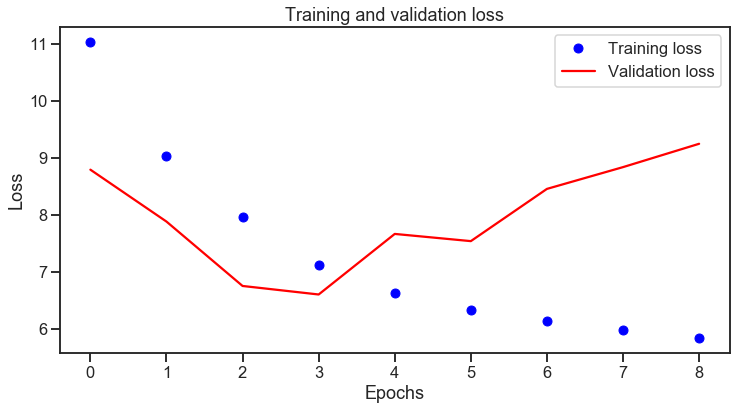

In [616]:
loss = basic_model_history.history['loss']
val_loss = basic_model_history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

fig.savefig(os.path.join(filepath, 'basic_model_history_training_validation_loss.png'))

In [617]:
print(np.argmin(val_loss))
#val_loss[70]

3


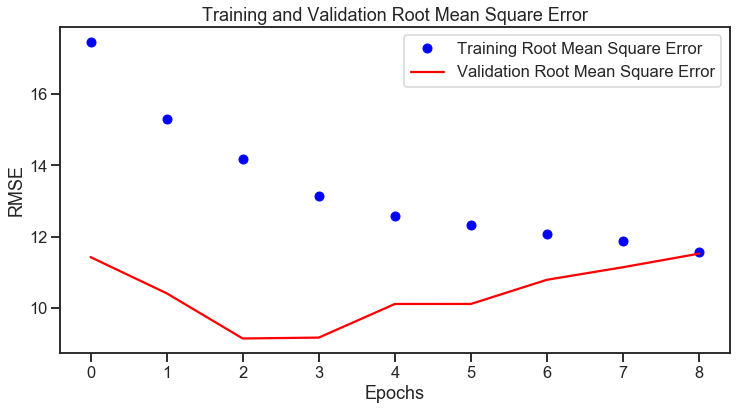

In [618]:
hist_rmse = basic_model_history.history['rmse']
val_rmse = basic_model_history.history['val_rmse']
epochs = range(len(hist_rmse))

fig_rmse = plt.figure(figsize=(12,6))
ax_rmse= fig_rmse.add_subplot(111)

plt.plot(epochs, hist_rmse, 'bo', label='Training Root Mean Square Error')
plt.plot(epochs, val_rmse, 'r', label='Validation Root Mean Square Error')
plt.title('Training and Validation Root Mean Square Error')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

plt.show()
fig_rmse.savefig(os.path.join(filepath, 'basic_model_history_training_validation_RMSE.png'))

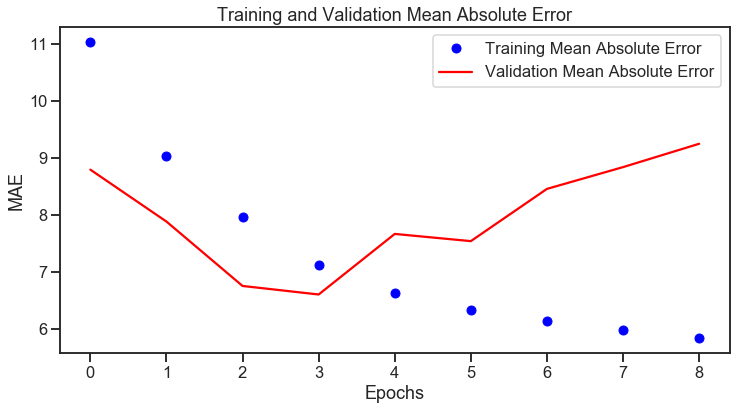

In [619]:
mae = basic_model_history.history['mean_absolute_error']
val_mae = basic_model_history.history['val_mean_absolute_error']
epochs = range(len(mae))

fig_mae = plt.figure(figsize=(12,6))
ax_mae = fig_mae.add_subplot(111)

plt.plot(epochs, mae, 'bo', label='Training Mean Absolute Error')
plt.plot(epochs, val_mae, 'r', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()
fig_mae.savefig(os.path.join(filepath, 'basic_model_history_training_validation_mae.png'))

In [620]:
saved_model = load_model(os.path.join(filepath,'basic_lstm_model.h5'),  custom_objects={'rmse': rmse})

basic_lstm_model_train_evaluation = saved_model.evaluate(forecasters, pollution_real, verbose=0)
basic_lstm_model_test_evaluation = saved_model.evaluate(forecasters_test, pollution_real_test, verbose=0)
print(basic_lstm_model_train_evaluation)
print(basic_lstm_model_test_evaluation)

[6.794190962514235, 6.794190962514235, 9.380489979846315]
[7.274255328034369, 7.274255328034369, 9.566157818598663]


In [621]:
basic_lstm_model_predictions = saved_model.predict(forecasters_test)
basic_lstm_model_evaluation =  saved_model.evaluate(forecasters_test, pollution_real_test)
print(basic_lstm_model_evaluation)
print(saved_model.metrics_names)

2516/2516 [==============================] - 0s 73us/step
[7.274255328034369, 7.274255328034369, 9.566157818598663]
['loss', 'mean_absolute_error', 'rmse']


In [622]:
print(basic_lstm_model_predictions.shape)
print(basic_lstm_model_predictions.ravel().shape)

(2516, 1)
(2516,)


In [623]:
basic_lstm_model_prediction_vs_actual_dataframe = pd.DataFrame({'Actual PM2.5': pollution_real_test, 'Predicted PM2.5':basic_lstm_model_predictions.ravel()}) 
basic_lstm_model_prediction_vs_actual_dataframe
## save predictions by basic lstm model
basic_lstm_model_prediction_vs_actual_dataframe.to_csv(os.path.join(filepath , 'basic_lstm_model_predictions.csv'))

### Creation Neural Network Architecture,Training & Evaluation  On Recurrent LSTM and DROPOUT layers
The last parameter with the value 18 represents, the number of features

In [624]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.utils import plot_model

deep_lstm_callbacks_list = [
    EarlyStopping(  # interrupts training when improvement stops 
        monitor='val_loss', 
        patience=5, 
        mode='min'), 
    
   ModelCheckpoint( #saves the current weights after every epock
        filepath=os.path.join(filepath, 'deep_lstm_best_model.h5'),
        monitor='val_loss',save_best_only=True) # these 2 arguments mean , you won't overwrite the model file unless val_loss has improved which  allows you to keep the best model seen during training.
]

regressor_model = Sequential()
regressor_model.add(LSTM(units=64, return_sequences = True, input_shape = (forecasters.shape[1],number_of_features)))
regressor_model.add(Dropout(0.3))
number_of_features
regressor_model.add(LSTM(units = 32, return_sequences = True))
regressor_model.add(Dropout(0.2))

regressor_model.add(LSTM(units = 32, return_sequences = True))
regressor_model.add(Dropout(0.2))

regressor_model.add(LSTM(units = 32))
regressor_model.add(Dropout(0.2))

regressor_model.add(Dense(units = 1))

regressor_model.compile(optimizer = 'adam', loss = 'mean_absolute_error',metrics = ['mean_absolute_error',rmse] )

##Training the model
history = regressor_model.fit(forecasters, pollution_real,epochs = 100,
                              validation_data=(forecasters_validation,pollution_real_validation),batch_size = 32 , 
                              callbacks=deep_lstm_callbacks_list)

Train on 8814 samples, validate on 1256 samples
Epoch 1/100
8814/8814 [==============================] - 38s 4ms/step - loss: 10.6343 - mean_absolute_error: 10.6343 - rmse: 16.9909 - val_loss: 8.8313 - val_mean_absolute_error: 8.8313 - val_rmse: 11.5485
Epoch 2/100
8814/8814 [==============================] - 12s 1ms/step - loss: 9.3413 - mean_absolute_error: 9.3413 - rmse: 15.3760 - val_loss: 8.8277 - val_mean_absolute_error: 8.8277 - val_rmse: 11.4253
Epoch 3/100
8814/8814 [==============================] - 11s 1ms/step - loss: 9.3595 - mean_absolute_error: 9.3595 - rmse: 15.4797 - val_loss: 8.8266 - val_mean_absolute_error: 8.8266 - val_rmse: 11.3713
Epoch 4/100
8814/8814 [==============================] - 11s 1ms/step - loss: 9.3295 - mean_absolute_error: 9.3295 - rmse: 15.4557 - val_loss: 8.4953 - val_mean_absolute_error: 8.4953 - val_rmse: 11.2532
Epoch 5/100
8814/8814 [==============================] - 11s 1ms/step - loss: 8.1347 - mean_absolute_error: 8.1347 - rmse: 14.2975 - v

In [625]:
#regressor_model.save('/content/drive/My Drive/Uni/Msc Comp Science/Year Two/Research/experiments/data/AirQuality/AirQo/airquality_prediction_bugolobi_04_20_2019.h5')

regressor_model.save(os.path.join(filepath,'airquality_prediction_model.h5'))
regressor_model.summary()
regressor_model_architecture_path = os.path.join(filepath, 'deep_lstm_model_plot.png')
plot_model(regressor_model, to_file=regressor_model_architecture_path, show_shapes=False, show_layer_names=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_65 (LSTM)               (None, 3, 64)             21248     
_________________________________________________________________
dropout_52 (Dropout)         (None, 3, 64)             0         
_________________________________________________________________
lstm_66 (LSTM)               (None, 3, 32)             12416     
_________________________________________________________________
dropout_53 (Dropout)         (None, 3, 32)             0         
_________________________________________________________________
lstm_67 (LSTM)               (None, 3, 32)             8320      
_________________________________________________________________
dropout_54 (Dropout)         (None, 3, 32)             0         
_________________________________________________________________
lstm_68 (LSTM)               (None, 32)                8320      
__________

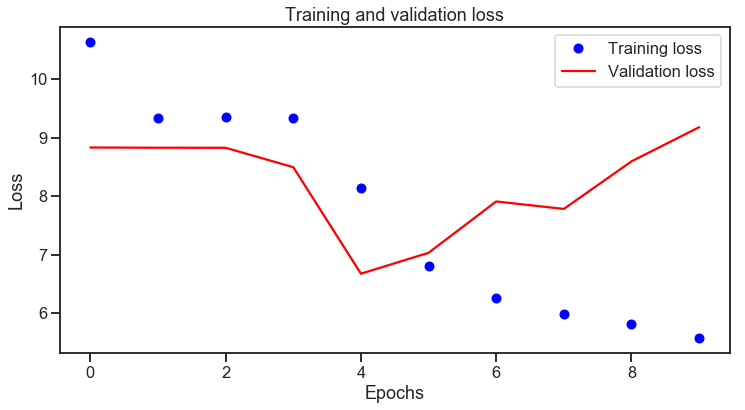

In [626]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig_deep_lstm_loss= plt.figure(figsize=(12,6))
ax = fig_deep_lstm_loss.add_subplot(111)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

fig_deep_lstm_loss.savefig(os.path.join(filepath, 'deep_lstm_model_history_training_validation_loss.png'))

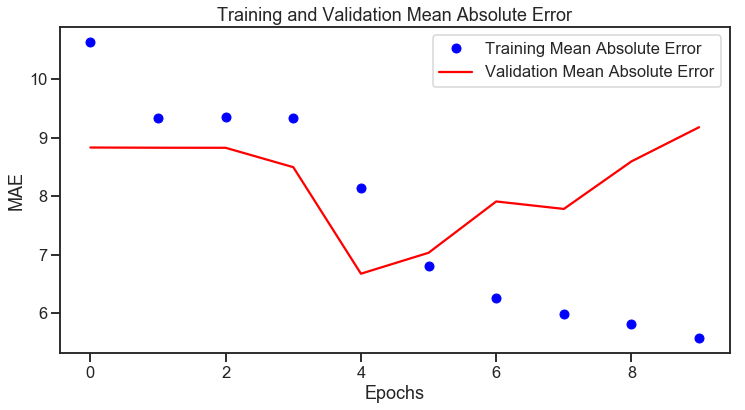

In [627]:
mae = history.history['mean_absolute_error']
val_mae = history.history['val_mean_absolute_error']
epochs = range(len(mae))

fig_deep_lstm_mae = plt.figure(figsize=(12,6))
ax_mae = fig_deep_lstm_mae.add_subplot(111)

plt.plot(epochs, mae, 'bo', label='Training Mean Absolute Error')
plt.plot(epochs, val_mae, 'r', label='Validation Mean Absolute Error')
plt.title('Training and Validation Mean Absolute Error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.show()
fig_mae.savefig(os.path.join(filepath, 'deep_lst_mmodel_history_training_validation_mae.png'))

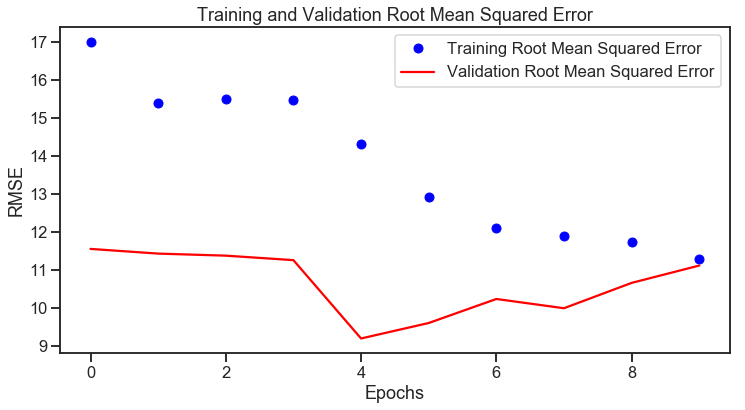

In [628]:
hist_rmse = history.history['rmse']
val_rmse = history.history['val_rmse']
epochs = range(len(hist_rmse))

fig_rmse = plt.figure(figsize=(12,6))
ax_rmse= fig_rmse.add_subplot(111)

plt.plot(epochs, hist_rmse, 'bo', label='Training Root Mean Squared Error')
plt.plot(epochs, val_rmse, 'r', label='Validation Root Mean Squared Error')
plt.title('Training and Validation Root Mean Squared Error')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

plt.show()
fig_rmse.savefig(os.path.join(filepath, 'deep_model_history_training_validation_RMSE.png'))

### Making predictions (forecasts) using the deep recurrent lstm
1. Convert test set in the same format accepted by model
1. make the forecasts directly on the testing dataset

### Make prediction and evaluation using the developed deep lstm model

In [629]:
#saved_best_deep_lstm_model = load_model(os.path.join(filepath,'deep_lstm_best_model.h5'),  custom_objects={'rmse': rmse})
saved_best_deep_lstm_model = load_model(os.path.join(filepath,'airquality_prediction_model.h5'),  custom_objects={'rmse': rmse})
deep_lstm_model_train_evaluation = saved_best_deep_lstm_model.evaluate(forecasters, pollution_real, verbose=0)
deep_lstm_model_test_evaluation = saved_best_deep_lstm_model.evaluate(forecasters_test, pollution_real_test, verbose=0)
print(deep_lstm_model_train_evaluation)
print(deep_lstm_model_test_evaluation)

[5.052259079799215, 5.052259079799215, 7.409502994562456]
[10.398631961622375, 10.398631961622375, 11.88752461237824]


In [630]:
deep_lstm_model_predictions = saved_best_deep_lstm_model.predict(forecasters_test)
deep_lstm_model_evaluation =  saved_best_deep_lstm_model.evaluate(forecasters_test, pollution_real_test)

deep_lstm_model_prediction_vs_actual_dataframe = pd.DataFrame({'Actual PM2.5': pollution_real_test, 'Predicted PM2.5':deep_lstm_model_predictions.ravel()}) 
deep_lstm_model_prediction_vs_actual_dataframe
## save predictions by basic lstm model
deep_lstm_model_prediction_vs_actual_dataframe.to_csv(os.path.join(filepath , 'deep_lstm_model_predictions.csv'))

2516/2516 [==============================] - 1s 292us/step


In [631]:
#print(forecasters_test.shape)
print(deep_lstm_model_predictions.shape)

(2516, 1)


In [632]:
print('predictions', deep_lstm_model_predictions.mean())
print('actual pm2.5 values', pollution_real_test.mean())

predictions 23.928753
actual pm2.5 values 16.882154213036564


### Verification of the average in the results of the forecasts and in the actual results

In [633]:
print('predictions', deep_lstm_model_predictions.mean())
print('actual pm2.5 values', pollution_real_test.mean())

predictions 23.928753
actual pm2.5 values 16.882154213036564


### Visualization of the predictions and actual values of PM2.5
1. #### using bar chart

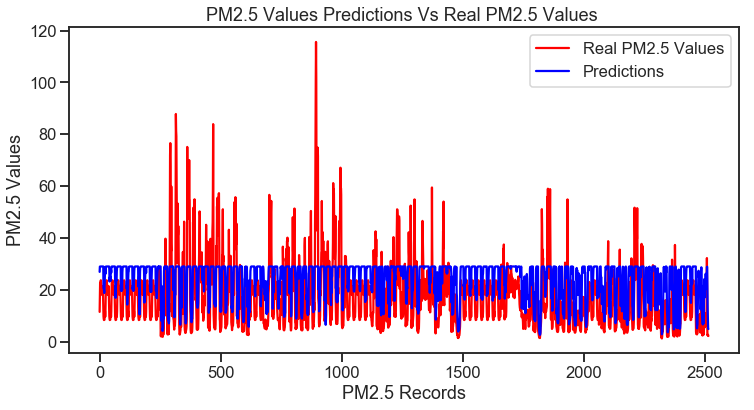

In [634]:
fig_deep_lstm_predictions_vs_actual = plt.figure(figsize=(12,6))
ax_fig_deep_lstm_predictions_vs_actual = fig_deep_lstm_predictions_vs_actual.add_subplot(111)
plt.plot(pollution_real_test, color = 'red', label = 'Real PM2.5 Values')
plt.plot(deep_lstm_model_predictions, color = 'blue', label = 'Predictions')
plt.title('PM2.5 Values Predictions Vs Real PM2.5 Values ')
plt.xlabel('PM2.5 Records')
plt.ylabel('PM2.5 Values')
plt.legend()

fig_deep_lstm_predictions_vs_actual.savefig(os.path.join(filepath, 'deep_lstm_model_prediction_vs_actual.png'))

### 2. using line graphs

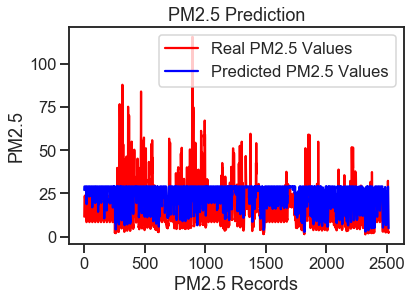

In [635]:
plt.plot(pollution_real_test, color = 'red', label = 'Real PM2.5 Values')
plt.plot(deep_lstm_model_predictions, color = 'blue', label = 'Predicted PM2.5 Values')
plt.title('PM2.5 Prediction')
plt.xlabel('PM2.5 Records')
plt.ylabel('PM2.5')
plt.legend()
plt.show()

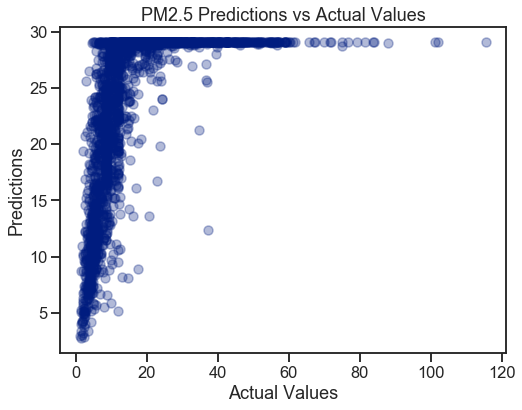

In [636]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')
fig_deep_lstm_predictions_vs_actual_scatter = plt.figure(figsize=(8,6))
ax_fig_deep_lstm_predictions_vs_actual_scatter = fig_deep_lstm_predictions_vs_actual_scatter.add_subplot(111)
ax = ax_fig_deep_lstm_predictions_vs_actual_scatter
# we are going to use y_test, y_test_pred
ax.scatter(pollution_real_test, deep_lstm_model_predictions, alpha=.3)

ax.set(xlabel='Actual Values', 
       ylabel='Predictions',
       title='PM2.5 Predictions vs Actual Values');

fig_deep_lstm_predictions_vs_actual_scatter.savefig(os.path.join(filepath, 'deep_lstm_model_predictions_vs_actual_values_scatter.png'))

### saving results to file

In [637]:
with open(os.path.join(filepath, "results_summary.txt"), "w+") as text_file:
        print("SVR RMSE : {}\n SVR MAE : {} \n Basic LSTM: {} \n Deep LSTM : {}, \n metrics {}"
              .format(svr_rmse.round(2),svr_mae.round(2), basic_lstm_model_evaluation, deep_lstm_model_evaluation, model.metrics_names ), file=text_file)